In [44]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


In [2]:
filename='Email-offer.csv'
example = pd.read_csv(filename, header =0)

In [3]:
example

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0
5,37,Female,0
6,43,Male,1
7,38,Male,1
8,27,Male,0
9,42,Female,0


In [6]:
#implementation of Simple Regression over a data set

y, X = dmatrices('TookAction ~ Age + Gender' ,
                 
example, return_type="dataframe")

print (X.columns)   

Index(['Intercept', 'Gender[T.Male]', 'Age'], dtype='object')


In [7]:
y = np.ravel(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
test_prediction = model2.predict(X_test)
print (test_prediction)

[ 1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  1.  1.]


In [10]:
print (metrics.accuracy_score(y_test, test_prediction))

1.0


In [11]:
model2.score(X, y)

0.93999999999999995

In [14]:
y_pred_class = model2.predict(X_test)

In [15]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[10  0]
 [ 0 10]]


In [18]:
scores, pvalues = chi2(X, y)
pvalues

array([  1.00000000e+00,   1.48914673e-01,   2.49712614e-20])

In [23]:
#first st towards churn modeling

filename='Churn-Modelling.csv'
bank = pd.read_csv(filename, header =0)

In [24]:
#getting categorical variable into dummy variable
bank1 = pd.get_dummies(bank['Gender'])

In [25]:
bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [26]:
#getting dummies for column Geography
bank2 = pd.get_dummies(bank['Geography'])

In [27]:
#appending the dummies to the original data set  
bank_new = bank.join(bank1)

In [28]:
bank_new1 = bank_new.join(bank2)
bank_new1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,0,0,1,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0


In [29]:
bank_new1.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Female               uint8
Male                 uint8
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [38]:
bank_new2 = bank_new1[['Exited','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Female','Male','France','Germany','Spain']]

In [63]:
bank_new3 = bank_new2[['Exited','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Female','Germany','Spain']]

In [31]:
#implementation of the first model with many features for backward elimination using P-values
y, X = dmatrices('Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary \
                    + Female + Germany + Spain' ,
                 
bank_new1, return_type="dataframe")

print (X.columns)

Index(['Intercept', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Female', 'Germany',
       'Spain'],
      dtype='object')


In [32]:
y = np.ravel(y)

In [64]:
train_cols = bank_new3.columns[1:]

In [66]:
logit = sm.Logit(bank_new3['Exited'], bank_new3[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.441462
         Iterations 6


In [68]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 29 Mar 2018   Pseudo R-squ.:                  0.1267
Time:                        12:58:39   Log-Likelihood:                -4414.6
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                6.027e-269
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0040      0.000    -21.105      0.000      -0.004      -0.004
Age                 0.0563      0.002     24.163      0.000       0.052       0.061
Tenure             -0.0443      0.009     -4.900      0.000      -0.062      -0.027
Balance          6.351e-07   4.92e-07      1.290      0.197    -3.3e-07     1.6e-06
NumOfProducts      -0.3663      0.045     -8.100      0.000      -0.455      -0.278
HasCrCard          -0.2179      0.057     -3.856      0.000      -0.329      -0.107
IsActiveMember     -1.0756      0.056    -19.146      0.000      -1.186      -0.965
EstimatedSalary  -1.04e-06   4.55e-07     -2.284      0.022   -1.93e-06   -1.48e-07
Female              0.4378      0.053      8.223      0.000       0.333       0.542
Germany             0.7965      0.067     11.871      0.000       0.665       0.928
Spain              -0.0557      0.069     -0.805      0.421      -0.191       0.080
===================================================================================
"""

In [82]:
bank_new6 = bank_new3[['Exited','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Female','Germany']]

In [83]:
train_cols = bank_new6.columns[1:]

In [78]:
bank_new4 = result.predict(bank_new3[train_cols])

In [84]:
logit = sm.Logit(bank_new6['Exited'], bank_new6[train_cols])

# fit the model
result1 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.441494
         Iterations 6


In [86]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Thu, 29 Mar 2018   Pseudo R-squ.:                  0.1266
Time:                        13:27:16   Log-Likelihood:                -4414.9
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                6.788e-270
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0040      0.000    -21.296      0.000      -0.004      -0.004
Age                 0.0562      0.002     24.154      0.000       0.052       0.061
Tenure             -0.0443      0.009     -4.908      0.000      -0.062      -0.027
Balance          6.266e-07   4.92e-07      1.273      0.203   -3.38e-07    1.59e-06
NumOfProducts      -0.3678      0.045     -8.138      0.000      -0.456      -0.279
HasCrCard          -0.2183      0.056     -3.863      0.000      -0.329      -0.108
IsActiveMember     -1.0762      0.056    -19.159      0.000      -1.186      -0.966
EstimatedSalary -1.047e-06   4.55e-07     -2.300      0.021   -1.94e-06   -1.55e-07
Female              0.4378      0.053      8.225      0.000       0.334       0.542
Germany             0.8151      0.063     12.926      0.000       0.692       0.939
===================================================================================
"""

In [87]:
bank_new7 = bank_new6[['Exited','CreditScore','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Female','Germany']]

In [88]:
train_cols = bank_new7.columns[1:]

In [89]:
logit = sm.Logit(bank_new7['Exited'], bank_new7[train_cols])

# fit the model
result2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.441575
         Iterations 6


In [90]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 29 Mar 2018   Pseudo R-squ.:                  0.1264
Time:                        13:29:31   Log-Likelihood:                -4415.8
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                1.163e-270
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0040      0.000    -21.754      0.000      -0.004      -0.004
Age                 0.0565      0.002     24.364      0.000       0.052       0.061
Tenure             -0.0438      0.009     -4.855      0.000      -0.061      -0.026
NumOfProducts      -0.3808      0.044     -8.640      0.000      -0.467      -0.294
HasCrCard          -0.2166      0.056     -3.833      0.000      -0.327      -0.106
IsActiveMember     -1.0755      0.056    -19.144      0.000      -1.186      -0.965
EstimatedSalary  -1.01e-06   4.54e-07     -2.223      0.026    -1.9e-06   -1.19e-07
Female              0.4376      0.053      8.220      0.000       0.333       0.542
Germany             0.8497      0.057     14.905      0.000       0.738       0.961
===================================================================================
"""

In [92]:
bank_new8 = result2.predict(bank_new7[train_cols])

In [93]:
bank_new8.to_csv('Probability1.csv')

In [80]:
bank6=bank[['RowNumber','Exited']]

In [81]:
bank6.to_csv('RowNumber.csv')

In [33]:
model3 = LogisticRegression()
model3.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
model3.score(X, y)

0.78969999999999996

In [35]:
scores, pvalues = chi2(X, y)
pvalues

array([  1.00000000e+00,   9.96353608e-25,   0.00000000e+00,
         7.05344899e-02,   0.00000000e+00,   2.45493956e-02,
         6.98496209e-01,   1.56803624e-27,   0.00000000e+00,
         3.59669973e-15,   5.81457176e-51,   4.92250487e-06])

In [39]:
corr = np.corrcoef(bank_new2, rowvar=0)  # correlation matrix
w, v = np.linalg.eig(corr)        # eigen values & eigen vectors
w

array([  2.06140826e+00,   1.91104910e+00,   1.51668030e+00,
         6.18935417e-01,   5.42960569e-01,   1.19633212e+00,
         1.10797272e+00,   1.07976535e+00,   9.68497886e-01,
         1.01385845e+00,   9.85276077e-01,   9.97263767e-01,
         6.96893605e-17,   1.12012974e-15])

In [42]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [43]:
vif.round(1)

,VIF Factor,features
0,81.6,Intercept
1,1.0,CreditScore
2,1.0,Age
3,1.0,Tenure
4,1.3,Balance
5,1.1,NumOfProducts
6,1.0,HasCrCard
7,1.0,IsActiveMember
8,1.0,EstimatedSalary
9,1.0,Female


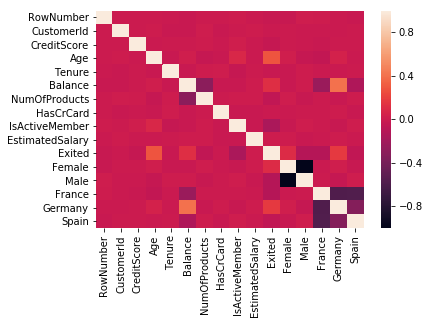

In [45]:
corr = bank_new1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [46]:
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.018196,0.018196,0.008590,-0.000044,-0.009905
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,0.002641,-0.002641,-0.004049,-0.003097,0.007800
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.002857,-0.002857,-0.008928,0.005538,0.004780
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.027544,-0.027544,-0.039208,0.046897,-0.001685
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.014733,0.014733,-0.002848,-0.000567,0.003868
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.012087,0.012087,-0.231329,0.401110,-0.134892
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.021859,-0.021859,0.001230,-0.010419,0.009039
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005766,0.005766,0.002467,0.010577,-0.013480
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.022544,0.022544,0.003317,-0.020486,0.016732
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.008112,-0.008112,-0.003332,0.010297,-0.006482


In [53]:
filename='Churn-Modelling-Test-Data.csv'
test = pd.read_csv(filename, header =0)

In [55]:
test1 = pd.get_dummies(bank['Gender'])
test2 = pd.get_dummies(bank['Geography'])

In [56]:
test_new = test.join(test1)

In [57]:
test_new1 = test_new.join(test2)

In [59]:
test_new2 = test_new1[['Exited','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Female','Germany','Spain']]

In [61]:
y_ans = test_new2[['Exited']]

In [60]:
y_pred_class = model3.predict(test_new2)

In [62]:
print(metrics.confusion_matrix(y_ans, y_pred_class))

[[718  22]
 [242  18]]
